In [8]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from skimage import measure
import imutils
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split


# character dataset - original images



> Download dataset from Kaggle



In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d mehdisahraei/persian-alpha
!unzip /content/persian-alpha.zip -d /content/persian-alpha



> Create iamge_info dataframe & X , Y 



In [ ]:

main_folder_name = '/content/persian-alpha/alpha/'
main_folder_path = os.listdir(main_folder_name)

image_name_list = []
image_path_list = []
label_list = []

x = np.empty([4299, 32 , 32 ])
y = []
count = 0

for folder in main_folder_path :
  single_folder_name  = main_folder_name + folder
  single_folder_path = os.listdir(single_folder_name)
  for image_name in single_folder_path :
    image_path = single_folder_name + "/" +image_name
    label =folder.split("-")[1]
    if 'long' in folder :
      label =label + folder.split("-")[2]
    image_name_list.append(image_name)
    image_path_list.append(image_path)
    label_list.append(label)

    image = cv2.imread(image_path , cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image , (32 , 32 ))
    x[count , : , :] =np.array(image)
    y.append(label)
    count += 1

In [ ]:
image_info_df = pd.DataFrame({
    "image_name": image_name_list,
    "image_path": image_path_list ,
    "label" : label_list 
}, )

In [ ]:
image_info_df.to_csv('/content/drive/MyDrive/ocr_models/image_info_df.csv')



> train test validation split



In [ ]:
train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(x,y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)



> dataset information :



In [ ]:
print("train x.shape :" , X_train.shape , "y.shape :" ,len(y_train))
print("validation x.shape :" , X_valid.shape , "y.shape :" , len(y_valid))
print("test x.shape :" , X_test.shape , "y.shape :" , len(y_test))
num_classes = len(set(y))
print("number of classes :" , num_classes )

train x.shape : (3439, 32, 32) y.shape : 3439
validation x.shape : (430, 32, 32) y.shape : 430
test x.shape : (430, 32, 32) y.shape : 430
number of classes : 43


In [ ]:
for i in range(0 , 20) :
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.show()



> create label dataframe



In [ ]:
classes_name = list(set(y))
labels_nums = [i for i in range(0,len(classes_name))]
y_df = pd.DataFrame(
    {'class_names': classes_name,
     'labels_nums': labels_nums,
    })
y_df

,class_names,labels_nums
0,ye,0
1,p,1
2,n,2
3,d,3
4,b,4
5,m,5
6,kh,6
7,alef,7
8,he,8
9,f,9




> preprocessing :
Change y labels to numeric -
normalization
change type tp float32



In [4]:
def convert_y(y):
  numeric_y = np.zeros(len(y))
  for i in range(len(y)):
    numeric_y[i] = np.where(y_df['class_names'] == y[i])[0][0]
  return numeric_y

def categorical(y):
  cat_y = to_categorical(y , num_classes = 43)
  return cat_y

def reshape_x(x):
  reshaped_x = x.reshape(-1 , 32 , 32 , 1)
  return reshaped_x

def normalization(x) :
  new_x = x/255
  return new_x

def edit_type(x , y):
  edited_x = x.astype(np.float32)
  edited_y = y.astype(np.float32)
  return edited_x , edited_y

def preprocess(x ,  y):
  reshaped_x = reshape_x(x)
  numeric_y = convert_y(y)
  cat_y = categorical(numeric_y)
  normal_x = normalization(reshaped_x)
  pre_x , pre_y = edit_type(normal_x , cat_y)
  return pre_x , pre_y

In [ ]:
pre_X_train , pre_y_train = preprocess(X_train ,  y_train)
pre_X_val , pre_y_val = preprocess(X_valid ,  y_valid)
pre_X_test , pre_y_test = preprocess(X_test ,  y_test)

In [ ]:
print("y_train example :" , y_train[0:20])
print("y_val exalple :" , y_valid[0:20])
print("y_test example :" , y_test[0:20])

y_train example : ['nine', 'zad', 'five', 'zlong', 'tlong', 'five', 'sin', 'p', 'ye', 'b', 'seven', 'five', 'zh', 'p', 'b', 'zero', 'one', 'six', 'eight', 'alef']
y_val exalple : ['ghyin', 'd', 'seven', 'sin', 'zh', 'le', 't', 'n', 'alef', 'r', 'ye', 'ghe', 'le', 'z', 'zlong', 'ghyin', 'six', 'shin', 'v', 'he']
y_test example : ['se', 'anewfive', 't', 't', 'eight', 'tlong', 't', 'alef', 'm', 'jim', 'h', 'kh', 'he', 'sad', 'seven', 'sad', 'one', 'v', 'k', 'g']


# create cropped dataset :

In [5]:
image_info_df = pd.read_csv('/content/drive/MyDrive/ocr_models/image_info_df.csv')
y_df = pd.read_csv('/content/drive/MyDrive/ocr_models/y_df.csv')




> Define editing image functions:



In [ ]:
def apply_treshold(image1) :

  img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  thresh1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                            cv2.THRESH_BINARY, 199, 5)
  return thresh1


def char_label_contor(tresh) :
  # invert black number to white number
  inverted_tresh = np.invert(tresh)
  labels = measure.label(inverted_tresh, background=0)
  charCandidates = np.zeros(inverted_tresh.shape, dtype="uint8")
  return labels , charCandidates, inverted_tresh


def prepare_boding_box(labels ,charCandidates, inverted_tresh ) :
  i = 0
  new_bondingbox = []
  for label in np.unique(labels):
  # if this is the background label, ignore it
    if label == 0:
      continue
    i +=1
    
    # print("this is i :" , i)

    # otherwise, construct the label mask to display only connected components for the
    # current label, then find contours in the label mask
    labelMask = np.zeros(inverted_tresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    cnts = cv2.findContours(labelMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    # cnts = cnts[0] if imutils.is_cv2() else cnts[1]

    # plt.imshow(labelMask)
    # plt.show()

    # ensure at least one contour was found in the mask
    if len(cnts) > 0:

      # print("pass if")

      # grab the largest contour which corresponds to the component in the mask, then
      # grab the bounding box for the contour
      c = max(cnts, key=cv2.contourArea)
      (boxX, boxY, boxW, boxH) = cv2.boundingRect(c)

      # compute the aspect ratio, solidity, and height ratio for the component
      aspectRatio = boxW / float(boxH)
      solidity = cv2.contourArea(c) / float(boxW * boxH)
      heightRatio = boxH / float(inverted_tresh.shape[0])

      # print("aspectRatio" , aspectRatio , "solidity" , solidity , "heightRatio" , heightRatio)

      # determine if the aspect ratio, solidity, and height of the contour pass
      # the rules tests
      keepAspectRatio = aspectRatio < 3.0
      keepSolidity = solidity > 0.09
      keepHeight = heightRatio > 0.01 and heightRatio < 2.0

      # print("keepAspectRatio :" , keepAspectRatio , "keepSolidity:" , keepSolidity , "keepHeight" , keepHeight)
      # print("=================================")

      # check to see if the component passes all the tests
      if keepAspectRatio and keepSolidity and keepHeight:
        # compute the convex hull of the contour and draw it on the character
        # candidates mask
        hull = cv2.convexHull(c)
        cv2.drawContours(charCandidates, [hull], -1, 255, -1)
        new_bondingbox.append(cv2.boundingRect(charCandidates))

  # plt.imshow(charCandidates)
  # plt.show()

  # print("bonding_box:" , new_bondingbox)
  # print("bondingbox -1 :" , [new_bondingbox[-1]])
  # print("len bonding box" , len(new_bondingbox))

  return ([new_bondingbox[-1]])

def display_bonding_box(image , new_bondingbox ):

  uu =  image.copy()
  for rect in new_bondingbox:
      # Get the coordinates from the bounding box
    x,y,w,h = rect 
    cv2.rectangle(uu, (x-1, y-3), (x + w +1, y + h + 3), (255,0,0), 1)
  cv2_imshow(uu)

def crop_iamge(tresh , new_bondingbox) :
  TARGET_WIDTH = 32
  TARGET_HEIGHT = 32
  image = tresh.copy()
  for rect in new_bondingbox:

      # Get the coordinates from the bounding box
      x,y,w,h = rect

      # Crop the character from the mask
      # and apply bitwise_not because in our training data for pre-trained model
      # the characters are black on a white background
      crop = image[y:y+h, x:x+w]
      # crop = cv2.bitwise_not(crop)

      # Get the number of rows and columns for each cropped image
      # and calculate the padding to match the image input of pre-trained model
      rows = crop.shape[0]
      columns = crop.shape[1]
      paddingY = (TARGET_HEIGHT - rows) // 2 if rows < TARGET_HEIGHT else int(0.17 * rows)
      paddingX = (TARGET_WIDTH - columns) // 2 if columns < TARGET_WIDTH else int(0.45 * columns)
      
      # Apply padding to make the image fit for neural network model
      crop = cv2.copyMakeBorder(crop, paddingY, paddingY, paddingX, paddingX, cv2.BORDER_CONSTANT, None, 255)

      # Convert and resize image
      # crop = cv2.cvtColor(crop, cv2.COLOR_GRAY2RGB)     
      crop = cv2.resize(crop, (TARGET_WIDTH, TARGET_HEIGHT))
      # print("********************************this is crop :")
      # cv2_imshow(crop)
      # plt.imshow(crop)
      # plt.show()
      # print("********************************")
  return crop

def do_crop_iamge(image_path):
  image = cv2.imread(image_path)
  tresh = apply_treshold(image)
  labels ,charCandidates ,  inverted_tresh =char_label_contor(tresh)
  new_bondingbox = prepare_boding_box(labels ,charCandidates, inverted_tresh )
  # prediction = final_predict(tresh , new_bondingbox)
  # print("=========================")
  # display_bonding_box(image , new_bondingbox )
  crop = crop_iamge(tresh , new_bondingbox)
  return crop



> create and save cropped dataset :



In [ ]:
croped_X = np.empty([4299, 32 , 32 ])
croped_image_path_list = []
croped_y = []
count = 0

for image_path in image_info_df.image_path :
  print(image_path)
  croped_image = do_crop_iamge(image_path)
  label =image_path.split("-")[1]
  croped_X[count , : , :] = croped_image
  y = image_info_df[image_info_df['image_path'] == image_path].label[count]
  croped_y.append(y)
  croped_image_path_list.append(image_path)
  count += 1

croped_data_pd = pd.DataFrame(
    {'croped_image_path_list': croped_image_path_list,
     'croped_y': croped_y,
    })
  

np.save('/content/drive/MyDrive/ocr_models/new_croped_X.npy' , croped_X) 
np.save('/content/drive/MyDrive/ocr_models/new_croped_y.npy', croped_y)
croped_data_pd.to_csv('/content/drive/MyDrive/ocr_models/croped_data_pd.csv')


In [10]:
print(croped_X.shape)
print(len(croped_y))

(4299, 32, 32)
3377




> load prepared dataset from drive



In [11]:
croped_X = np.load('/content/drive/MyDrive/ocr_models/new_croped_X.npy')
croped_y = np.load('/content/drive/MyDrive/ocr_models/new_croped_y.npy')

In [ ]:
m = 1400
for i in range(m , m+10) :
  plt.imshow(croped_X[i])
  plt.title(croped_y[i])
  plt.show()


In [12]:
train_size=0.8
X_train_crop, X_rem_crop, y_train_crop, y_rem_crop = train_test_split(croped_X,croped_y, train_size=0.8)
test_size = 0.5
X_valid_crop, X_test_crop, y_valid_crop, y_test_crop = train_test_split(X_rem_crop,y_rem_crop, test_size=0.5)

print("train x.shape :" , X_train_crop.shape , "y.shape :" ,len(y_train_crop))
print("validation x.shape :" , X_valid_crop.shape , "y.shape :" , len(y_valid_crop))
print("test x.shape :" , X_test_crop.shape , "y.shape :" , len(y_test_crop))
num_classes = len(set(croped_y))
print("number of classes :" , num_classes )

train x.shape : (3439, 32, 32) y.shape : 3439
validation x.shape : (430, 32, 32) y.shape : 430
test x.shape : (430, 32, 32) y.shape : 430
number of classes : 43


In [13]:
pre_X_train_crop , pre_y_train_crop = preprocess(X_train_crop ,  y_train_crop)
pre_X_val_crop , pre_y_val_crop = preprocess(X_valid_crop ,  y_valid_crop)
pre_X_test_crop , pre_y_test_crop = preprocess(X_test_crop ,  y_test_crop)

print("y_train example :" , y_train_crop[0:20])
print("y_val exalple :" , y_valid_crop[0:20])
print("y_test example :" , y_test_crop[0:20])

y_train example : ['he' 'che' 'ayin' 'eight' 'le' 'm' 'z' 'h' 'z' 'three' 'b' 'm' 'seven'
 'shin' 'z' 'five' 'g' 'four' 'shin' 'v']
y_val exalple : ['seven' 'zad' 'seven' 'sad' 'che' 'he' 'r' 'd' 't' 'k' 'k' 'four' 'sad'
 'f' 'v' 'z' 'zlong' 'anewfive' 'p' 'b']
y_test example : ['ye' 'zal' 'f' 'k' 'le' 'ghe' 'seven' 'seven' 'anewfive' 'r' 'g' 'ye' 'p'
 'zero' 'n' 'ghyin' 'zlong' 'sin' 'v' 'ayin']


# Model :

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.regularizers import l2 
from tensorflow.keras.models import save_model


In [15]:
def LeNet5v2(input_shape = (32, 32, 1), classes = 43):

  """
    Implementation of a modified LeNet-5.
    Only those layers with learnable parameters are counted in the layer numbering.
    
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras

  """
  model = Sequential(
      [
          # layer

       Conv2D(filters = 32 , kernel_size = 5 , strides = 1 ,  activation = 'relu' , input_shape = (32 , 32 , 1) , kernel_regularizer=l2(0.0005) , name = 'convolution_1') ,

      #  layer 2
       Conv2D(filters=32 , kernel_size = 5 , strides = 1 ,  name = 'convolution_2', use_bias=False) ,
       BatchNormalization(name = 'batchnorm_1') ,
       Activation("relu") , 
       MaxPooling2D(pool_size = 2 , strides = 2 , name = 'max_pool_1') ,
       Dropout(0.25 , name = 'dropout_1') ,

      #  layer 3
       Conv2D(filters = 64 , kernel_size = 3 , strides = 1 ,  activation = 'relu' , input_shape = (32 , 32 , 1) , kernel_regularizer=l2(0.0005) , name = 'convolution_3') ,

      #  layer 4
       Conv2D(filters=64 , kernel_size = 3 , strides = 1 ,  name = 'convolution_4', use_bias=False) ,
       BatchNormalization(name = 'batchnorm_2') ,
       Activation("relu") , 
       MaxPooling2D(pool_size = 2 , strides = 2 , name = 'max_pool_2') ,
       Dropout(0.25 , name = 'dropout_2') ,
       Flatten(name = 'flatten'),
      
      # layer 6
       Dense(units = 256, name = 'fully_connected_1', use_bias=False) ,
       BatchNormalization(name = 'batchnorm_3'),
       Activation("relu"),

       # Layer 7
       Dense(units = 128, name = 'fully_connected_2', use_bias=False),
       BatchNormalization(name = 'batchnorm_4'),
       Activation("relu"),
        
    # Layer 8
       Dense(units = 84, name = 'fully_connected_3', use_bias=False),
       BatchNormalization(name = 'batchnorm_5'),
       Activation("relu"),
       Dropout(0.25, name = 'dropout_3'),

    # Output
       Dense(units = 43, activation = 'softmax', name = 'output')
        
      ]
  )

  model._name = 'LeNet5v2'

  return model

In [20]:
# Build model
print("[INFO] Compiling model...")
shape = (32 , 32 , 1)
model_LeNet5v2 = LeNet5v2(input_shape = (32, 32, 1), classes = num_classes)
model_LeNet5v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_LeNet5v2.summary()

[INFO] Compiling model...
Model: "LeNet5v2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convolution_1 (Conv2D)      (None, 28, 28, 32)        832       
                                                                 
 convolution_2 (Conv2D)      (None, 24, 24, 32)        25600     
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 24, 24, 32)       128       
 tion)                                                           
                                                                 
 activation_5 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 12, 12, 32)        0         
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0         
                                

In [ ]:
history_model1_LeNet5 = model_LeNet5v2.fit(pre_X_train, pre_y_train, epochs = 50, batch_size = 64, 
                                          validation_data = (pre_X_val,pre_y_val))

Epoch 1/50
54/54 [==============================] - 23s 369ms/step - loss: 3.3157 - accuracy: 0.1748 - val_loss: 3.8422 - val_accuracy: 0.0209
Epoch 2/50
54/54 [==============================] - 20s 364ms/step - loss: 2.0511 - accuracy: 0.4885 - val_loss: 4.3799 - val_accuracy: 0.0116
Epoch 3/50
54/54 [==============================] - 18s 330ms/step - loss: 1.3510 - accuracy: 0.6583 - val_loss: 4.9868 - val_accuracy: 0.0116
Epoch 4/50
54/54 [==============================] - 20s 366ms/step - loss: 0.9608 - accuracy: 0.7409 - val_loss: 5.2394 - val_accuracy: 0.0209
Epoch 5/50
54/54 [==============================] - 20s 367ms/step - loss: 0.7463 - accuracy: 0.7933 - val_loss: 5.5697 - val_accuracy: 0.0209
Epoch 6/50
54/54 [==============================] - 19s 351ms/step - loss: 0.5940 - accuracy: 0.8360 - val_loss: 5.7357 - val_accuracy: 0.0209
Epoch 7/50
54/54 [==============================] - 21s 374ms/step - loss: 0.5013 - accuracy: 0.8662 - val_loss: 4.9467 - val_accuracy: 0.0209

<Figure size 432x288 with 0 Axes>

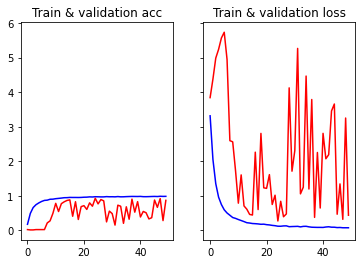

In [ ]:
# print("model3_LeNet5v2 results :")
# print(f"Train result : acc = 0.9955 , loss =  0.0200 ")
# print(f"Val result : acc = 0.9926 , loss = 0.0371 ")
# print(f"Test result : acc ={test_model3_LeNet5v2_acc} , loss = {test_model3_LeNet5v2_loss} ")



LeNet5v2_acc = history_model1_LeNet5.history['accuracy']
LeNet5v2_val_acc = history_model1_LeNet5.history['val_accuracy']
LeNet5v2_loss = history_model1_LeNet5.history['loss']
LeNet5v2_val_loss = history_model1_LeNet5.history['val_loss']

plt.figure(figsize=(6 , 4))


fig , ax = plt.subplots(1 , 2 , sharey='row' )
# plt.subplot(1 ,2,1)
ax[0].plot(LeNet5v2_acc , color = 'blue' , label = "Training Accuracy" )
ax[0].plot(LeNet5v2_val_acc , color = 'red' , label ="Val Accuracy" )
ax[0].set_title('Train & validation acc')

# plt.subplot(1 ,2,2)
ax[1].plot(LeNet5v2_loss , color = 'blue' , label="Training loss" )
ax[1].plot(LeNet5v2_val_loss , color='red' , label="Val loss" )
ax[1].set_title('Train & validation loss')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(pre_y_test, axis=1) # Convert one-hot to index

y_pred = np.zeros(pre_y_test.shape[0])
for i in range(pre_y_test.shape[0]) :
  x = np.expand_dims(pre_X_test[i] , axis=0)
  predict = np.argmax(model_LeNet5v2.predict(x , verbose=False))
  y_pred[i] =predict

print(classification_report(Y_test, y_pred))

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        11
           1       0.92      1.00      0.96        11
           2       0.72      1.00      0.84        13
           3       1.00      0.85      0.92        13
           4       1.00      0.60      0.75        10
           5       1.00      0.50      0.67        10
           6       1.00      0.27      0.43        11
           7       1.00      1.00      1.00         7
           8       1.00      0.50      0.67         8
           9       1.00      0.71      0.83         7
          10       1.00      0.83      0.91         6
          11       0.90      0.90      0.90        10
          12       0.91      1.00      0.95        10
          13       1.00      1.00      1.00         6
          14       1.00      0.71      0.83         7
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00        12
          17       0.73    

In [ ]:
for i in range(0 , 20):

  print( "prediction:" ,np.argmax(model_LeNet5v2.predict(pre_X_test[i].reshape(1 , 32 , 32 ,1))))
  print(np.argmax(pre_y_test[i]))
  print("_______________")

1/1 [==============================] - 0s 27ms/step
prediction: 0
19
_______________
1/1 [==============================] - 0s 23ms/step
prediction: 0
0
_______________
1/1 [==============================] - 0s 23ms/step
prediction: 34
8
_______________
1/1 [==============================] - 0s 26ms/step
prediction: 22
22
_______________
1/1 [==============================] - 0s 26ms/step
prediction: 2
2
_______________
1/1 [==============================] - 0s 26ms/step
prediction: 41
26
_______________
1/1 [==============================] - 0s 25ms/step
prediction: 20
20
_______________
1/1 [==============================] - 0s 24ms/step
prediction: 34
8
_______________
1/1 [==============================] - 0s 24ms/step
prediction: 34
34
_______________
1/1 [==============================] - 0s 30ms/step
prediction: 26
26
_______________
1/1 [==============================] - 0s 32ms/step
prediction: 28
28
_______________
1/1 [==============================] - 0s 26ms/step
predictio

In [ ]:

save_model(model_LeNet5v2, "/content/drive/MyDrive/ocr_models/model_LeNet5v2_ocr.h5")

# Model on  crop data :

In [ ]:
history_model1_LeNet5_crop = model_LeNet5v2.fit(pre_X_train_crop, pre_y_train_crop, epochs = 50, batch_size = 64, 
                                          validation_data = (pre_X_val_crop,pre_y_val_crop))

Epoch 1/50
54/54 [==============================] - 28s 423ms/step - loss: 2.5849 - accuracy: 0.3742 - val_loss: 3.5879 - val_accuracy: 0.1372
Epoch 2/50
54/54 [==============================] - 19s 361ms/step - loss: 1.1265 - accuracy: 0.7962 - val_loss: 3.4688 - val_accuracy: 0.1163
Epoch 3/50
54/54 [==============================] - 22s 407ms/step - loss: 0.6251 - accuracy: 0.8933 - val_loss: 3.2379 - val_accuracy: 0.1605
Epoch 4/50
54/54 [==============================] - 20s 373ms/step - loss: 0.4009 - accuracy: 0.9320 - val_loss: 2.7742 - val_accuracy: 0.2860
Epoch 5/50
54/54 [==============================] - 20s 374ms/step - loss: 0.2744 - accuracy: 0.9590 - val_loss: 2.0781 - val_accuracy: 0.4628
Epoch 6/50
54/54 [==============================] - 21s 388ms/step - loss: 0.2176 - accuracy: 0.9648 - val_loss: 1.6816 - val_accuracy: 0.5628
Epoch 7/50
54/54 [==============================] - 19s 359ms/step - loss: 0.1627 - accuracy: 0.9750 - val_loss: 0.8434 - val_accuracy: 0.8163

<Figure size 432x288 with 0 Axes>

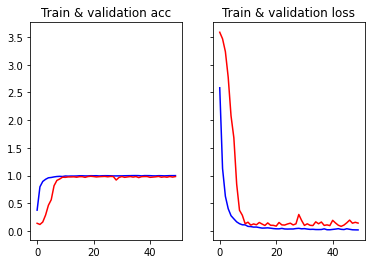

In [ ]:
# print("model3_LeNet5v2 results :")
# print(f"Train result : acc = 0.9955 , loss =  0.0200 ")
# print(f"Val result : acc = 0.9926 , loss = 0.0371 ")
# print(f"Test result : acc ={test_model3_LeNet5v2_acc} , loss = {test_model3_LeNet5v2_loss} ")



LeNet5v2_acc = history_model1_LeNet5_crop.history['accuracy']
LeNet5v2_val_acc = history_model1_LeNet5_crop.history['val_accuracy']
LeNet5v2_loss = history_model1_LeNet5_crop.history['loss']
LeNet5v2_val_loss = history_model1_LeNet5_crop.history['val_loss']

plt.figure(figsize=(6 , 4))


fig , ax = plt.subplots(1 , 2 , sharey='row' )
# plt.subplot(1 ,2,1)
ax[0].plot(LeNet5v2_acc , color = 'blue' , label = "Training Accuracy" )
ax[0].plot(LeNet5v2_val_acc , color = 'red' , label ="Val Accuracy" )
ax[0].set_title('Train & validation acc')

# plt.subplot(1 ,2,2)
ax[1].plot(LeNet5v2_loss , color = 'blue' , label="Training loss" )
ax[1].plot(LeNet5v2_val_loss , color='red' , label="Val loss" )
ax[1].set_title('Train & validation loss')

plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test_crop = np.argmax(pre_y_test_crop, axis=1) # Convert one-hot to index

y_pred_crop = np.zeros(pre_y_test_crop.shape[0])
for i in range(pre_y_test_crop.shape[0]) :
  x = np.expand_dims(pre_X_test_crop[i] , axis=0)
  predict = np.argmax(model_LeNet5v2.predict(x , verbose=False))
  y_pred_crop[i] =predict

print(classification_report(Y_test_crop, y_pred_crop))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.92      0.89        13
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        12
           8       1.00      0.88      0.93         8
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00         9
          11       0.93      0.93      0.93        14
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         9
          17       1.00    

In [ ]:
for i in range(0 , 20):

  print( "prediction:" ,np.argmax(model_LeNet5v2.predict(pre_X_test_crop[i].reshape(1 , 32 , 32 ,1))))
  print(np.argmax(pre_y_test_crop[i]))
  print("_______________")

1/1 [==============================] - 0s 32ms/step
prediction: 2
2
_______________
1/1 [==============================] - 0s 29ms/step
prediction: 20
20
_______________
1/1 [==============================] - 0s 33ms/step
prediction: 5
5
_______________
1/1 [==============================] - 0s 33ms/step
prediction: 13
13
_______________
1/1 [==============================] - 0s 35ms/step
prediction: 12
12
_______________
1/1 [==============================] - 0s 28ms/step
prediction: 1
1
_______________
1/1 [==============================] - 0s 34ms/step
prediction: 16
16
_______________
1/1 [==============================] - 0s 30ms/step
prediction: 11
11
_______________
1/1 [==============================] - 0s 26ms/step
prediction: 34
34
_______________
1/1 [==============================] - 0s 25ms/step
prediction: 5
5
_______________
1/1 [==============================] - 0s 27ms/step
prediction: 0
0
_______________
1/1 [==============================] - 0s 33ms/step
prediction: 

In [19]:
import tensorflow
!pip show tensorflow

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: kapre
